In [48]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount("/content/gdrive")

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/Colab Notebooks/"
model_loc = "/content/gdrive/My Drive/Colab Notebooks/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Practice_2 Jan 2023-Monday(P4Bioinfo).ipynb', 'Untitled0.ipynb', 'Untitled1.ipynb', 'heart.csv', 'heart.gsheet', '[1_April_2024]_Heart_Disease_NN_Navinthra Rao_A20EC0104.ipynb', 'Heart_Disease_NN_AmirIskandar.ipynb']


In [50]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

#Display all the first 5 rows of the data.
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [51]:
### 4. What is the purpose of the code that sets a list of categorical variables
### Answer: The code serves to indentify qualitative data attributes within a dataset to identify qualitative data attributes within a dataset to allow differentiate the different discrete. It is also to mention that these variables should be set as categorical value rather than numerical value.
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [52]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

<ipython-input-52-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-52-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-52-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-52-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-52-76ef3ba0124a>:3: FutureWarning: In a future version, t

In [53]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values #Line 3 allows the extraction of the target variable from the DataFrame data.
y = y.reshape(y.shape[0],1)  #Line 4 reshapes the y array.
x = data.drop(['target'],axis=1) #Line 5 drops the 'target' column from the DataFrame data in order to create the feature matrix x later.
y.shape
##

(303, 1)

In [54]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

# Normalize data (range 0 - 1)
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [55]:
### 8. Describe the heart dataset after implementing the min max normalization
# The values in the table was ranging from 0 to 1 after the "min max" normalization.
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# re-create train and validation set
test_ratio = 0.1 / 0.4
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(135, 21)
(46, 21)
(122, 21)


In [57]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

# The first layer with 64 neurons is the input layer, that allows to receive the feature inputs and allow the network architecture to learn hierarchical representations of the data.
# The second layer with 32 neurons is the hidden layer, responsible to capture complex patterns and relationships within the data frame.
# The final layer that has 1 neuron serves as the output layer,  responsible to produce the network's predictions or classifications.
# The softmax activation function in the output layer is utilized in machine learning primarily for multi-class classification tasks to transform raw output scores into a probability distribution over multiple classes, ensuring that the output values sum up to one.
# The sigmoid activation function in the final layer is suited for binary classification tasks, where it squashes the output values to a range between 0 and 1.


model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

# The first component is mean squared error loss function (loss='mse'). The loss function measures the discrepancy between the model's predictions and the actual target values during training.
# The second component is Adam optimizer (optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam')). The optimizer is responsible for updating the weights of the neural network during training to minimize the loss function.
# The third component is Metrics (metrics=['acc']). Metrics are used to evaluate the performance of the model during training and validation.
# Each of these components have a significant affect the model training and performance.
# The choice of loss function determines the training objective of the model and guides the optimization process.
# The optimizer controls how the model parameters are updated during training, affecting the speed and quality of convergence to an optimal solution.
# The selection of performance metrics provides insight into how well the model is performing during training and validation.

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [59]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
9/9 [==============================] - 2s 45ms/step - loss: 0.2513 - acc: 0.4667 - val_loss: 0.2521 - val_acc: 0.4130
Epoch 2/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2502 - acc: 0.5037 - val_loss: 0.2491 - val_acc: 0.5870
Epoch 3/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.2489 - acc: 0.7185 - val_loss: 0.2484 - val_acc: 0.7826
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2468 - acc: 0.8370 - val_loss: 0.2455 - val_acc: 0.8261
Epoch 5/1000
9/9 [==============================] - 0s 15ms/step - loss: 0.2427 - acc: 0.7926 - val_loss: 0.2402 - val_acc: 0.7174
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2363 - acc: 0.8148 - val_loss: 0.2347 - val_acc: 0.8043
Epoch 7/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2268 - acc: 0.8444 - val_loss: 0.2254 - val_acc: 0.8043
Epoch 8/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2155 - ac

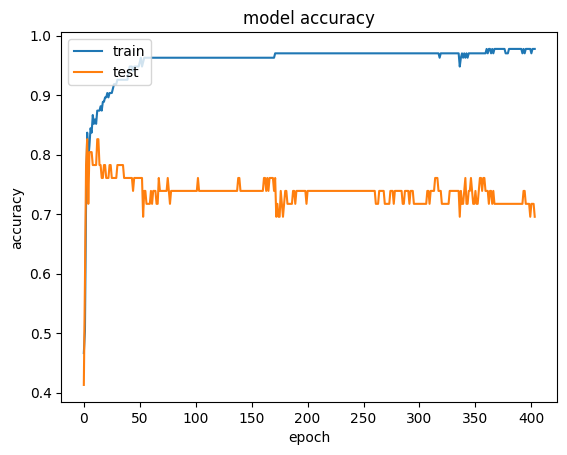

In [60]:
### 12. What does the plot generated by this code represent?

# This plot generated by the particular code represents the model's accuracy based on training, testing and validation dataset over each epoch values created and the comparison between them based on the respective graph.

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

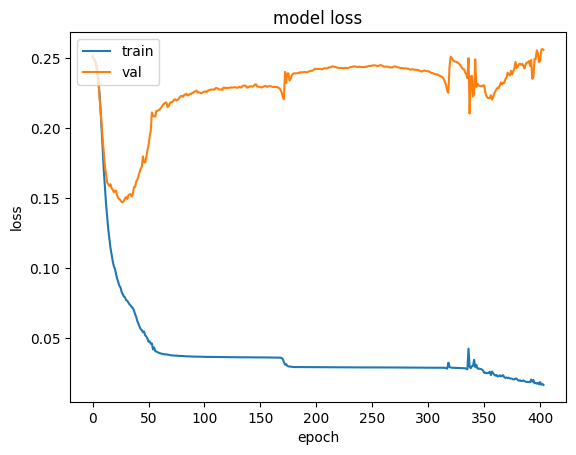

In [61]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.

plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [63]:
### 14. What is the purpose of evaluating the model on the test dataset?

### The purpose is to assess and evaluate the model's generalization performance on unseen data.

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

4/4 [==============================] - 0s 5ms/step - loss: 0.1742 - acc: 0.7869

acc: 78.69%
loss: 0.17


In [64]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

4/4 [==============================] - 0s 4ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [0]  Result: Fail
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result:

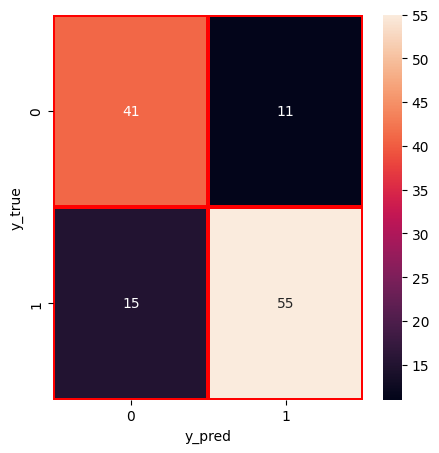


              precision    recall  f1-score   support

           0       0.73      0.79      0.76        52
           1       0.83      0.79      0.81        70

    accuracy                           0.79       122
   macro avg       0.78      0.79      0.78       122
weighted avg       0.79      0.79      0.79       122



In [65]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### A Confusion Matrix is a performance measurement tool used in machine learning to evaluate the performance of a classification model.
### It presents a summary of the predictions made by the model on a test dataset against the actual labels.
### "TP" stands for True Positives. These are the cases where the model correctly predicts the positive class.
### "FP" stands for False Positives. These are the cases where the model incorrectly predicts the positive class.
### "FN" stands for False Negatives. These are the cases where the model incorrectly predicts the negative class.
### "TN" stands for True Negatives. These are the cases where the model correctly predicts the negative class.

### 16. Explain the classification report produce.

# Based on the classification report produced, I can examine that the model performs really well due to the high score metrics.
# The model's accuracy is 122 and the  model's f1-score for the model is 0.79
# Hence, proven that the classification algorithm can perform well with the dataset and has the capability to predict unseen data with high level of accuracy.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))